In [1]:
%%bash

pip install -q kaggle
mkdir -p ~/.kaggle
cp drive/MyDrive/kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download -d alessiocorrado99/animals10

100%|██████████| 586M/586M [00:16<00:00, 38.2MB/s]


In [2]:
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [4]:
data_gen = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True
)

In [5]:
train_set = data_gen.flow_from_directory(
    "raw-img/",
    target_size=(224, 224),
    class_mode='binary',
    seed=123,
    subset='training',
    batch_size=32
)

valid_set = data_gen.flow_from_directory(
    "raw-img/",
    target_size=(224, 224),
    class_mode='binary',
    seed=123,
    subset='validation',
    batch_size=32
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(224, 224, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=3))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=3))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(420, activation='relu'))
model.add(keras.layers.Dense(120, activation='relu')) 
model.add(keras.layers.Dense(60, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [14]:
model.fit(x=train_set, epochs=20, batch_size=32, validation_data=valid_set, callbacks=[early_stopping])

Epoch 1/20
655/655 [==============================] - 299s 456ms/step - loss: 1.9946 - accuracy: 0.2851 - val_loss: 1.7420 - val_accuracy: 0.4104
Epoch 2/20
655/655 [==============================] - 294s 449ms/step - loss: 1.5018 - accuracy: 0.4850 - val_loss: 1.4141 - val_accuracy: 0.5113
Epoch 3/20
655/655 [==============================] - 294s 448ms/step - loss: 1.2914 - accuracy: 0.5580 - val_loss: 1.3427 - val_accuracy: 0.5409
Epoch 4/20
655/655 [==============================] - 293s 447ms/step - loss: 1.1772 - accuracy: 0.5976 - val_loss: 1.1784 - val_accuracy: 0.5942
Epoch 5/20
655/655 [==============================] - 292s 447ms/step - loss: 1.0915 - accuracy: 0.6280 - val_loss: 1.0717 - val_accuracy: 0.6405
Epoch 6/20
655/655 [==============================] - 292s 447ms/step - loss: 1.0336 - accuracy: 0.6462 - val_loss: 1.1976 - val_accuracy: 0.5938
Epoch 7/20
655/655 [==============================] - 293s 447ms/step - loss: 0.9778 - accuracy: 0.6686 - val_loss: 1.0690 -

1/1 [==============================] - 0s 15ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5989304e-20 0.0000000e+00]]


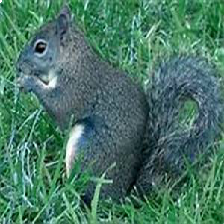

In [34]:
import cv2
import tensorflow as tf

# Load TensorFlow model and use it to detect objects in an image
import numpy as np

image = keras.preprocessing.image.load_img("raw-img/scoiattolo/OIP-zhLz2NNZOh527Bvrz2dlpAHaFw.jpeg", target_size=(224, 224))
image = keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)

# image = cv2.imread('raw-img/scoiattolo/OIP-zhLz2NNZOh527Bvrz2dlpAHaFw.jpeg')
# image = cv2.resize(image, (224, 224))
detections = model.predict(image)


# Draw a rectangle around each detected object
for detection in detections:
  start_point = (int(detection[0]), int(detection[1]))
  end_point = (int(detection[2]), int(detection[3]))
  cv2.rectangle(image[0], start_point, end_point, (255, 255, 255), 2)

# Display the image with the rectangles
from google.colab.patches import cv2_imshow
print(detections)
cv2_imshow(image[0])

In [29]:
train_set.class_indices

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}